In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('winequality-red.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.shape

(1599, 12)

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# checking Null values

In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# VISUALIZATION OF DATA

<AxesSubplot:>

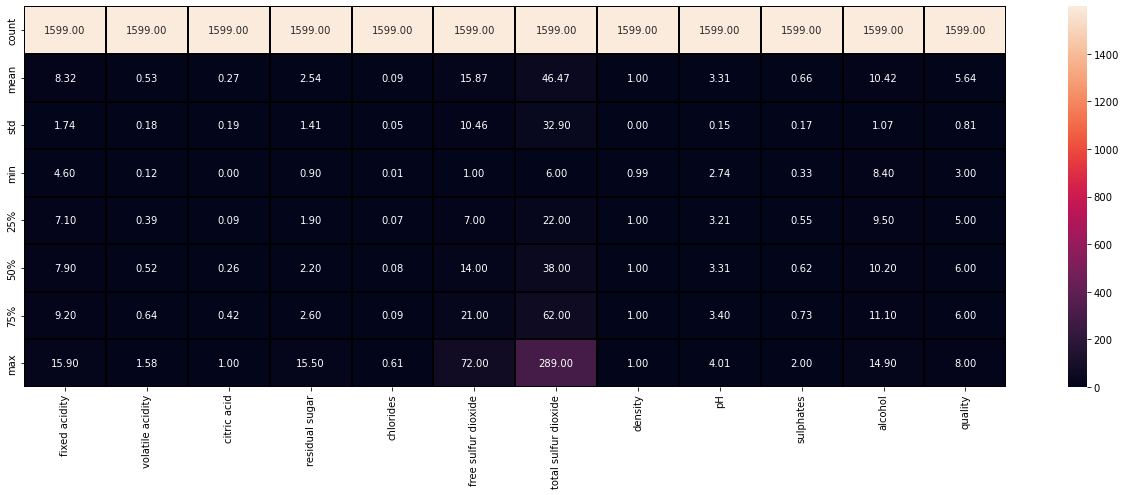

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(22,7))
sns.heatmap(data.describe(),annot = True, linewidths = 0.1 ,linecolor='black',fmt = '0.2f')

<AxesSubplot:>

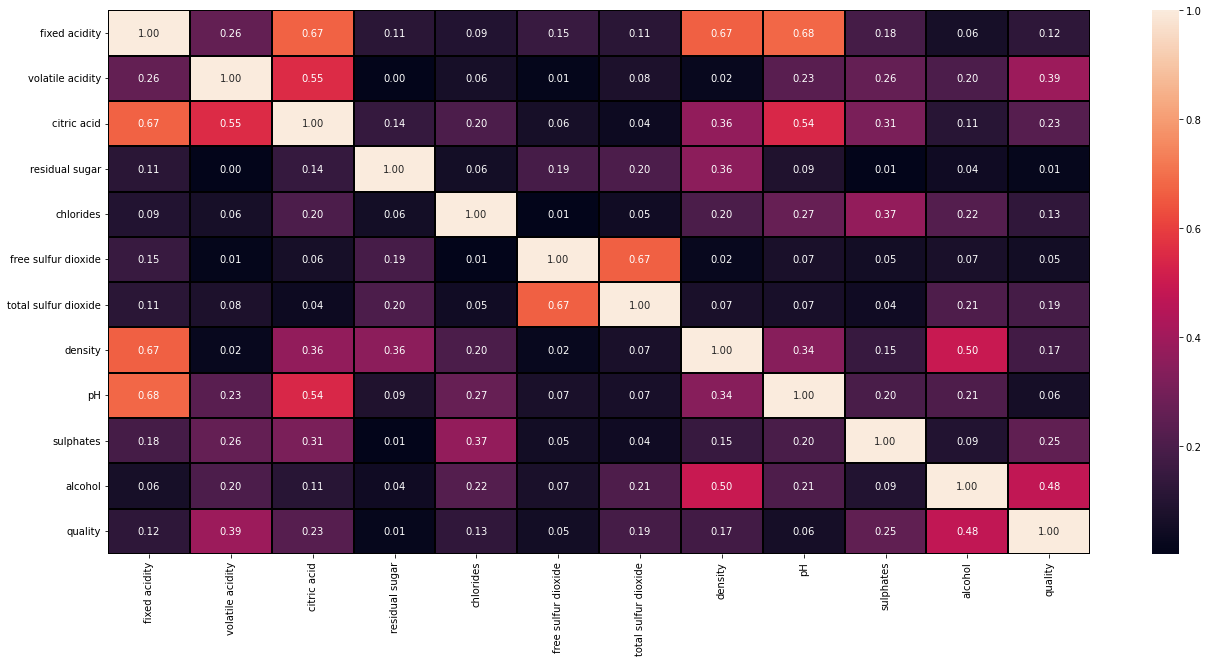

In [10]:
plt.figure(figsize=(22,10))
sns.heatmap(data.corr().abs(),annot = True, linewidths = 0.1 ,linecolor='black',fmt = '0.2f')

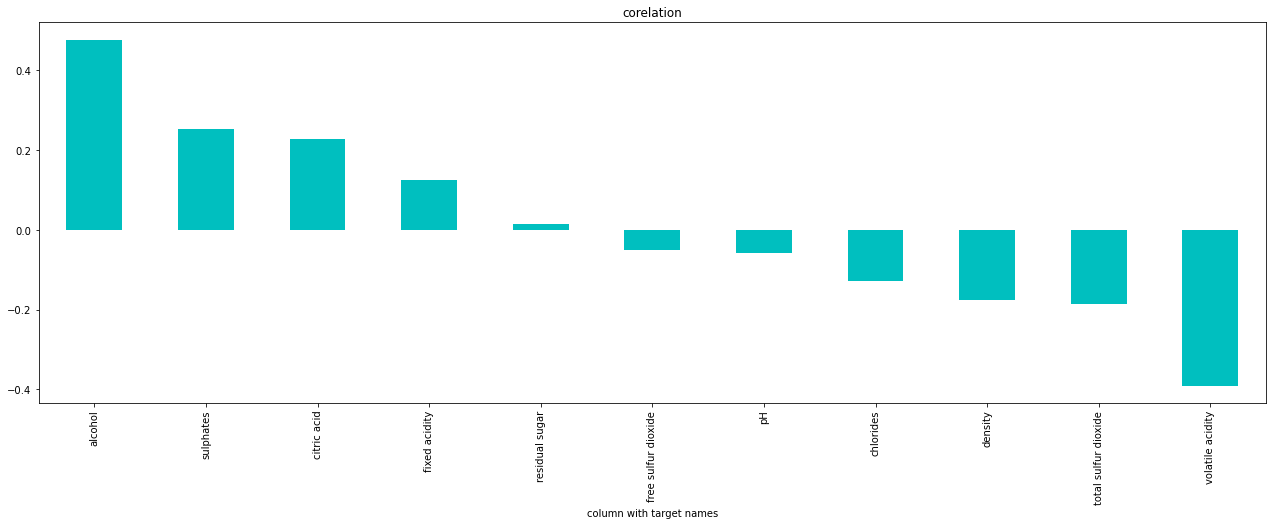

In [11]:
plt.figure(figsize=(22,7))
data.corr()['quality'].sort_values(ascending = False).drop(['quality']).plot(kind ='bar',color = 'c')
plt.xlabel('feature')
plt.xlabel('column with target names')
plt.title('corelation')
plt.show()

In [12]:
# AS per heatmap we donot have mullticollinearity

In [13]:
x = data.drop('quality',axis=1)
y = data["quality"]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=41)
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
clf.score(x_train,y_train)

1.0

In [17]:
y_pred = clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.621875

# IMPROVING ACCCURACY USING HYPER TUNNING

In [18]:
grid_params = {
    'criterion':['gini', 'entropy'],
    'max_depth':range(10,15),
    'min_samples_leaf':range(2,10),
    'min_samples_split':range(3,10),
    'max_leaf_nodes': range(5,10)
}

In [19]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=grid_params,
                          cv=5,n_jobs= -1)

In [20]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [21]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 3}


# Model confidence / Accuracy

In [23]:
from sklearn.metrics import classification_report
def metrix_score(clf,x_train,x_test,y_train,y_test,train =True):
    if train:
        y_pred = clf.predict(x_train)
        print("***********Train Result**********")
        print(accuracy_score(y_train,y_pred))
    elif train== False:
        pred = clf.predict(x_test)
        print("***********Test Result**********")
        print(accuracy_score(y_test,pred))
        print("Classification result********")
        print(classification_report(y_test,pred,digits=2))

In [26]:
# Creating Decision tree with new parameter and train


clf = DecisionTreeClassifier(criterion ='gini',
                         max_depth=10,
                         min_samples_leaf = 2,
                         min_samples_split = 3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=3)

In [27]:
# Calling function and passing dataset to check train and test score
# this is for training score
metrix_score(clf,x_train,x_test,y_train,y_test,train =True)
# This is for testing score
metrix_score(clf,x_train,x_test,y_train,y_test,train =False)

***********Train Result**********
0.8420641125879593
***********Test Result**********
0.634375
Classification result********
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.13      0.25      0.17         8
           5       0.62      0.70      0.66       125
           6       0.74      0.61      0.67       140
           7       0.66      0.64      0.65        42
           8       1.00      0.50      0.67         2

    accuracy                           0.63       320
   macro avg       0.53      0.45      0.47       320
weighted avg       0.66      0.63      0.64       320

